In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df = pd.read_csv('Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [26]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
price      0
dtype: int64

In [11]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [12]:
df.drop(columns='Unnamed: 0',inplace=True)
df[:3]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [ ]:
There are 14 attributes in each case of the dataset. They are:
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Bost
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [15]:
df.rename({'medv':'price'},axis=1,inplace=True)
df.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [16]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

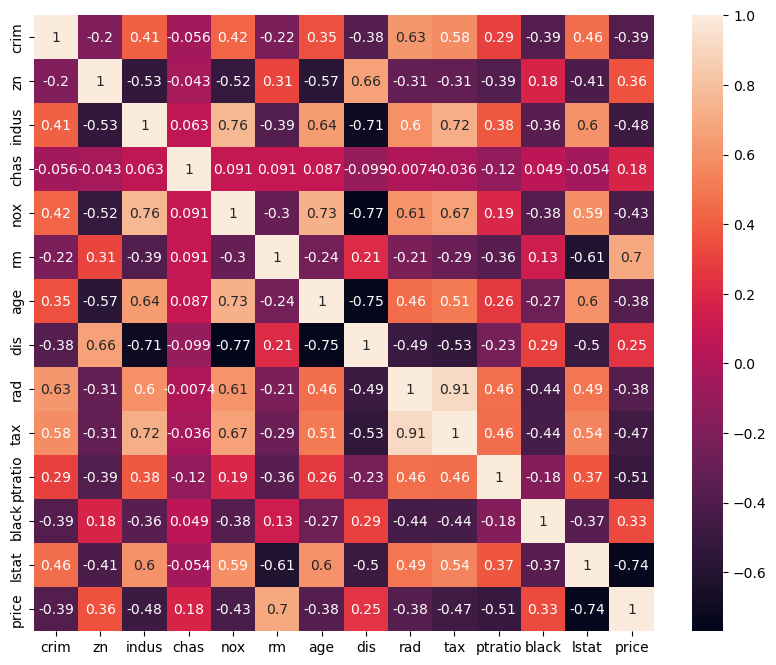

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),annot=True)

In [ ]:
# corr above 0.7 (+/-) we should consider for  further steps

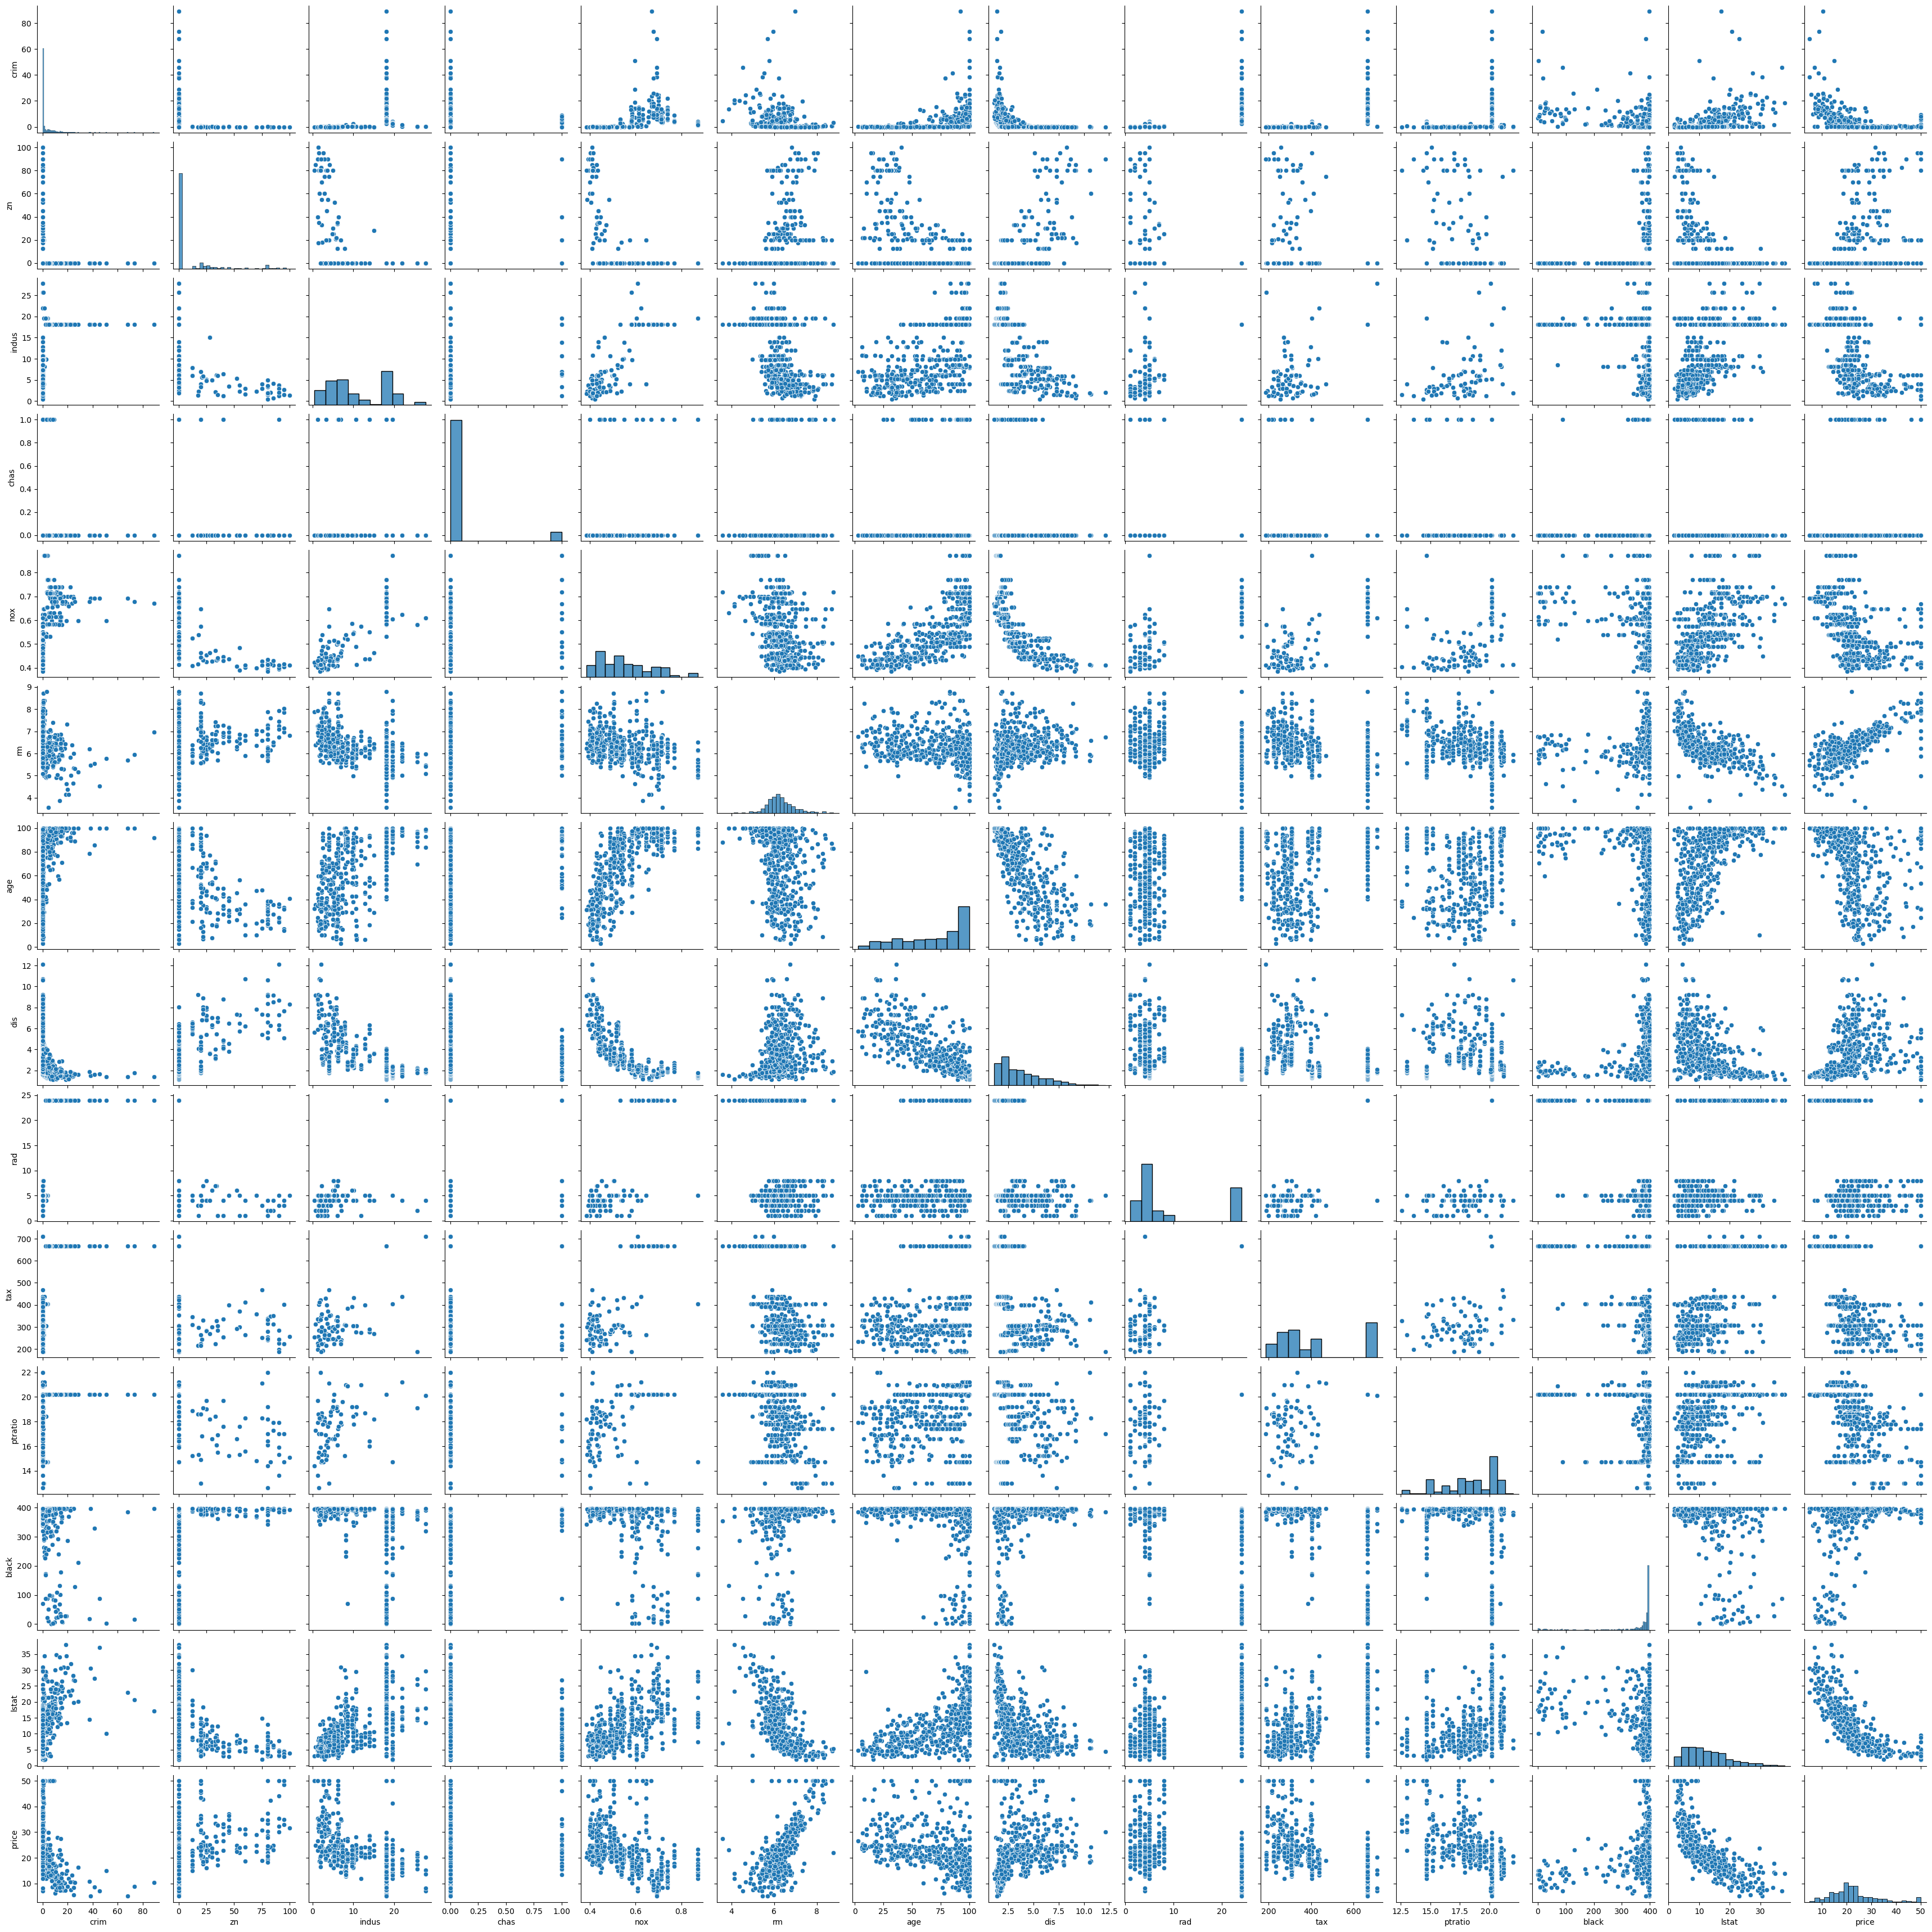

In [21]:
sns.pairplot(df)

In [ ]:
# we wl consider 'istat' and 'rm' clm w.r.t price

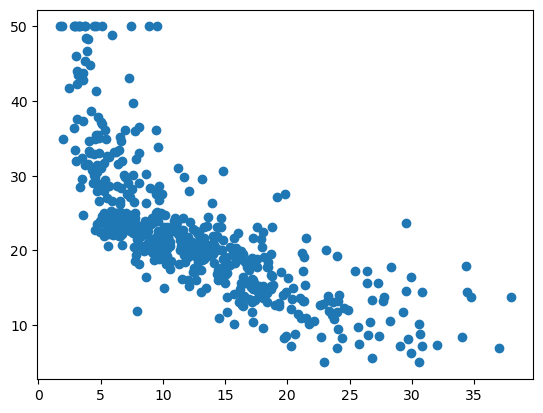

In [24]:
plt.scatter(x=df.lstat,y=df.price)   # +ve correlation

we can see from above plot there is negative corr between price and lstat, as standard of living is high, price will be high. 

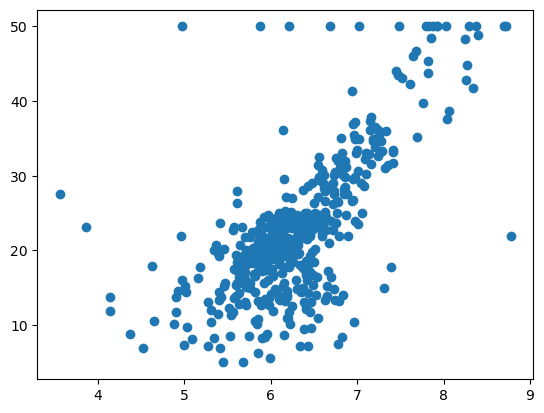

In [25]:
plt.scatter(x=df.rm,y=df.price)    # -ve correlation

We can see from above plot there is positive corr between no. of rooms and price, as no. of rooms inreases price also incease

### Now start with  multilinear-regression algorithm

In [28]:
x=df.loc[:,['rm','lstat']]
x

,rm,lstat
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
...,...,...
501,6.593,9.67
502,6.120,9.08
503,6.976,5.64
504,6.794,6.48


In [30]:
y=df.price
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

### splitting of data

In [31]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
x_train

,rm,lstat
477,5.304,24.91
15,5.834,8.47
332,6.031,7.83
423,6.103,23.29
19,5.727,11.28
...,...,...
106,5.836,18.66
270,5.856,13.00
348,6.635,5.99
435,6.629,23.27


In [39]:
x_test

,rm,lstat
173,6.416,9.04
274,6.758,3.53
491,5.983,18.07
72,6.065,5.52
452,6.297,17.27
...,...,...
412,4.628,34.37
436,6.461,18.05
411,6.657,21.22
86,6.015,12.86


In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model=LinearRegression()

### Trainning of data

In [40]:
model.fit(x_train,y_train)

LinearRegression()

### Testing of data

In [42]:
y_pred = model.predict(x_test)
y_pred

array([25.50510964, 30.8592405 , 17.42725985, 25.81325491, 19.64929972,
       22.90317032, 16.88571841, 14.61917747, 22.06066668, 20.03326882,
       17.34725148, 18.15555053, -2.53419257, 22.41228621, 19.92807359,
       26.93027912, 17.16881388,  3.46139894, 37.31795503, 18.49325989,
       26.09287374, 27.0359285 , 13.08646469, 26.07395803, 19.05197872,
       14.34439003, 22.50507619, 21.09395936, 17.80756143, 18.90537548,
       17.3189494 , 26.72355799, 27.62430957, 19.01752219, 15.4809415 ,
       17.37191951, 32.8765884 , 22.03500171, 20.02675295, 25.5193256 ,
       12.24468569, 28.82657024, 38.2438306 , 18.45117927, 25.65604941,
       16.5588818 , 15.7090024 , 26.97797141, 19.55868547, 28.94200451,
       20.60534552, 31.33646277, 17.88508649, 28.36639373, 34.9844153 ,
       23.96269158, 19.65312104, 31.54864539, 24.99070281, 15.11477808,
       27.10508448, 32.73300584, 29.58795549, 18.58249363, 28.64129064,
       10.75991895, 20.69510169, 26.34948505, 29.46875554, 16.79

In [43]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: price, Length: 102, dtype: float64

In [46]:
#checking score of train data
model.score(x_train,y_train)*100

65.01592679428923

In [47]:
#checking score of test data
model.score(x_test,y_test)*100

57.39577415025856

In [49]:
#checking score of predicted o/p
model.score(x_test,y_pred)*100

100.0

In [ ]:
#here we use this equation
y=mx+c
m=coef
c=intercept

In [50]:
model.coef_

array([ 5.46509877, -0.63249856])

In [51]:
model.intercept_

-3.8411770790048827

### plot data

<AxesSubplot:xlabel='price'>

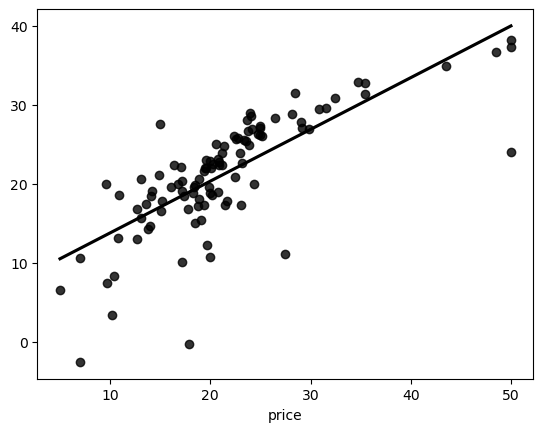

In [61]:
sns.regplot(y_test,y_pred,ci=None,color='black')

### checking performance

In [55]:
#MAE(meab absolute eror)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3.8987597213823584

In [56]:
#MSE(mean square error)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

31.24329060178364

In [57]:
#RMSE(root mean squared error)
from math import sqrt
sqrt(mean_squared_error(y_test,y_pred))

5.589569804715175

In [58]:
#r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5739577415025856

In [65]:
# external i/p
data = [[2,35],[3,30],[4,25],[5,20],[6,15],[7,10]]
ypred=model.predict(data)
ypred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-15.04842923,  -6.42083764,   2.20675395,  10.83434553,
        19.46193712,  28.08952871])

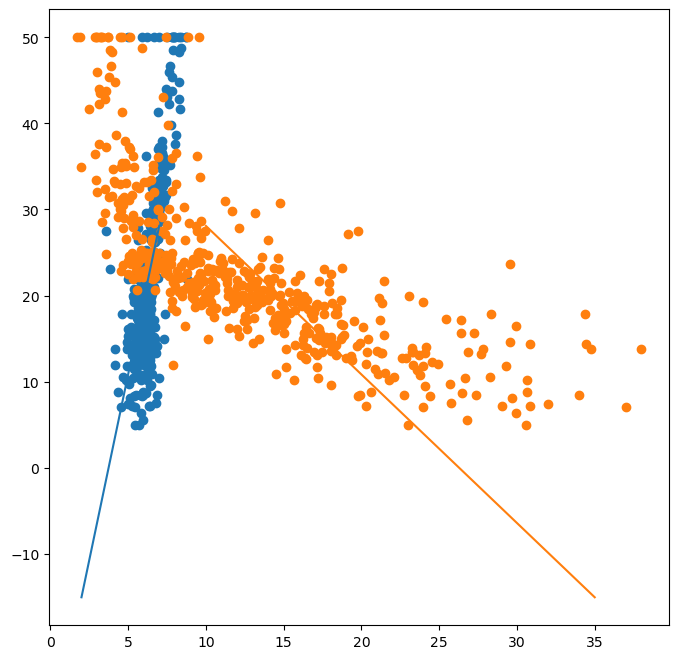

In [66]:
plt.figure(figsize=(8,8))
plt.plot(data,ypred)
plt.scatter(df.rm,df.price)
plt.scatter(df.lstat,df.price)